# 1. Import and Install Dependencies

In [81]:
# %pip install tensorflow==2.13.0rc0 tensorflow-gpu==2.12.0 opencv-python mediapipe sklearn matplotlib

In [82]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [83]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [84]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [85]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        
        draw_styled_landmarks(image, results)


        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [86]:
# def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [87]:
# def draw_styled_landmarks(image, results):
#     # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
#     # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                              ) 
#     # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                              ) 
#     # Draw right hand connections  
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                              ) 

In [88]:
# def draw_styled_landmarks(image, results):
#     # Draw face landmarks
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
#     # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                              )


In [89]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)

#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

In [90]:
# def draw_styled_landmarks(image, results):
#     # Draw face landmarks
#     face_connections = [
#         (0, 1), (1, 2), (2, 3), (3, 4), (5, 6), (6, 7), (7, 8),
#         (9, 10), (10, 11), (11, 12), (13, 14), (14, 15), (15, 16),
#         (17, 18), (18, 19), (19, 20), (21, 22), (22, 23), (23, 24),
#         (25, 26), (26, 27), (27, 28), (29, 30), (30, 31), (31, 32)
#     ]

#     for connection in face_connections:
#         start_point = connection[0]
#         end_point = connection[1]
#         cv2.line(image, (int(results.face_landmarks.landmark[start_point].x * image.shape[1]), int(results.face_landmarks.landmark[start_point].y * image.shape[0])),
#           (int(results.face_landmarks.landmark[end_point].x * image.shape[1]), int(results.face_landmarks.landmark[end_point].y * image.shape[0])),
#           (0, 255, 0), 2)


#     # Draw pose landmarks
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

#     # Draw hand landmarks
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [91]:
len(results.left_hand_landmarks.landmark)

21

In [92]:
draw_landmarks(frame, results)

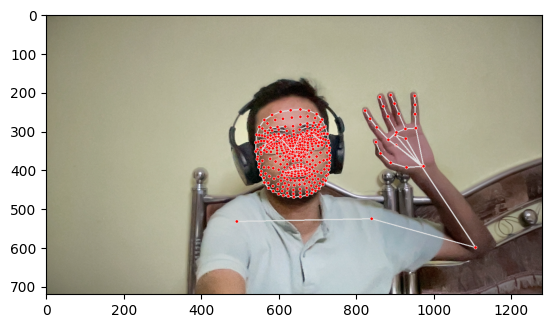

In [93]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [94]:
len(results.left_hand_landmarks.landmark)

21

In [95]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [96]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [97]:
len(pose)

132

In [98]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    face = np.zeros(1404)


In [99]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [100]:
result_test = extract_keypoints(results)

In [101]:
np.save('0', result_test)

In [102]:
np.load('0.npy')

array([ 0.49701732,  0.4919554 , -0.50807816, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [103]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [104]:
import os
import numpy as np

# Define the base data path
DATA_PATH = "MP_Data"  # Replace with your actual data path

# List of actions
actions = ["hello", "thanks", "iloveyou"]  # Replace with your list of actions

# Number of sequences
no_sequences = 5  # Replace with the desired number of sequences

for action in actions:
    action_dir = os.path.join(DATA_PATH, action)
    
    # Create the action directory if it doesn't exist
    if not os.path.exists(action_dir):
        os.makedirs(action_dir)
    
    # Find the maximum directory number
    try:
        dirmax = np.max(np.array(os.listdir(action_dir)).astype(int))
    except ValueError:
        # If no subdirectories exist, dirmax will be set to -1
        dirmax = -1

    for sequence in range(1, no_sequences + 1):
        # Create a new directory with the next sequence number
        new_dir = os.path.join(action_dir, str(dirmax + sequence))

        # Create the new directory
        try:
            os.makedirs(new_dir)
        except FileExistsError:
            pass  # If the directory already exists, move on to the next one


# 5. Collect Keypoint Values for Training and Testing

In [105]:
# Loop through frames
for frame_num in range(sequence_length):
    # Read the frame

    # Perform your processing to extract keypoints
    keypoints = extract_keypoints(results)  # You need to define this function

    # Create the directory if it doesn't exist
    npy_dir = os.path.join(DATA_PATH, action, str(sequence))
    os.makedirs(npy_dir, exist_ok=True)

    # Save the keypoints
    npy_path = os.path.join(npy_dir, str(frame_num) + '.npy')
    np.save(npy_path, keypoints)


In [106]:
import os

# Create directories if they don't exist
os.makedirs(os.path.dirname(npy_path), exist_ok=True)


In [107]:
# Create the directory if it doesn't exist
npy_dir = os.path.join(DATA_PATH, action, str(sequence))
os.makedirs(npy_dir, exist_ok=True)

# Save the keypoints
npy_path = os.path.join(npy_dir, str(frame_num) + '.npy')
np.save(npy_path, keypoints)


In [108]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Change the start_folder variable to 1 to start from sequence 1
    start_folder = 1
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # NEW Create directory and save keypoints
                npy_dir = os.path.join(DATA_PATH, action, str(sequence))
                os.makedirs(npy_dir, exist_ok=True)  # Create the directory if it doesn't exist
                npy_path = os.path.join(npy_dir, str(frame_num) + '.npy')
                np.save(npy_path, keypoints)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [109]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [110]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [111]:
label_map = {label:num for num, label in enumerate(actions)}

In [112]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [113]:
import os
print(os.getcwd())


/Users/prakharsingh/Documents/Hand Sign Detection


In [114]:
sequences, labels = [], []

for action in actions:
    action_dir = os.path.join(DATA_PATH, action)
    
    # Create the action directory if it doesn't exist
    if not os.path.exists(action_dir):
        os.makedirs(action_dir)
    
    # Loop through the sequences in the action directory
    for sequence_dir in os.listdir(action_dir):
        try:
            sequence = int(sequence_dir)
        except ValueError:
            continue  # Skip non-integer directory names (e.g., ".DS_Store")
        
        window = []
        for frame_num in range(sequence_length):
            file_path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            if not os.path.exists(file_path):
                continue  # Skip missing files
            res = np.load(file_path)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

        for i, sequence in enumerate(sequences):
            sequence_length = len(sequence)
            print(f"Sequence {i}: Length = {sequence_length}")

Sequence 0: Length = 30
Sequence 0: Length = 30
Sequence 1: Length = 0
Sequence 0: Length = 30
Sequence 1: Length = 0
Sequence 2: Length = 0
Sequence 0: Length = 30
Sequence 1: Length = 0
Sequence 2: Length = 0
Sequence 3: Length = 0
Sequence 0: Length = 30
Sequence 1: Length = 0
Sequence 2: Length = 0
Sequence 3: Length = 0
Sequence 4: Length = 0
Sequence 0: Length = 30
Sequence 1: Length = 0
Sequence 2: Length = 0
Sequence 3: Length = 0
Sequence 4: Length = 0
Sequence 5: Length = 0
Sequence 0: Length = 30
Sequence 1: Length = 0
Sequence 2: Length = 0
Sequence 3: Length = 0
Sequence 4: Length = 0
Sequence 5: Length = 0
Sequence 6: Length = 0
Sequence 0: Length = 30
Sequence 1: Length = 0
Sequence 2: Length = 0
Sequence 3: Length = 0
Sequence 4: Length = 0
Sequence 5: Length = 0
Sequence 6: Length = 0
Sequence 7: Length = 0
Sequence 0: Length = 30
Sequence 1: Length = 0
Sequence 2: Length = 0
Sequence 3: Length = 0
Sequence 4: Length = 0
Sequence 5: Length = 0
Sequence 6: Length = 0
Se

In [115]:
# sequences, labels = [], []
# for action in actions:
#     for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
#         window = []
#         for frame_num in range(sequence_length):
#             res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
#             window.append(res)
#         sequences.append(window)
#         labels.append(label_map[action])

In [116]:
shapes = [np.array(seq).shape for seq in sequences]
print(shapes)

[(30, 1662), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]


In [117]:
keypoints_count = 17 * 2  # If there are 17 keypoints with (x, y) coordinates

In [118]:
# Assuming desired_sequence_length is the length you want to achieve
desired_sequence_length = 100  # Adjust this value as needed

for i in range(len(sequences)):
    while len(sequences[i]) < desired_sequence_length:
        sequences[i].append(np.zeros((keypoints_count,)))  # Add zero-filled frames
    sequences[i] = sequences[i][:desired_sequence_length]  # Truncate to the desired length if necessary


In [133]:
import numpy as np

# Define the desired sequence length (e.g., 100) and the keypoints_count
desired_sequence_length = 100
keypoints_count = 1662  # Replace with the actual number of keypoints

# Initialize lists to store sequences and labels
sequences, labels = [], []

# Loop through your data and load sequences
for action in actions:
    action_dir = os.path.join(DATA_PATH, action)
    
    # Create the action directory if it doesn't exist
    if not os.path.exists(action_dir):
        os.makedirs(action_dir)
    
    # Loop through the sequences in the action directory
    for sequence_dir in os.listdir(action_dir):
        try:
            sequence = int(sequence_dir)
        except ValueError:
            continue  # Skip non-integer directory names (e.g., ".DS_Store")
        
        window = []
        for frame_num in range(desired_sequence_length):  # Use the desired sequence length
            try:
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
                
                # Check and ensure that each frame has the same shape
                if res.shape[0] != keypoints_count:
                    # Pad or truncate the frame to the desired number of keypoints
                    if res.shape[0] < keypoints_count:
                        pad_length = keypoints_count - res.shape[0]
                        res = np.pad(res, ((0, pad_length),), mode='constant')
                    else:
                        res = res[:keypoints_count]
                
            except FileNotFoundError:
                # Handle the case where the file doesn't exist (you can skip or pad with zeros)
                res = np.zeros((keypoints_count,))
                
            window.append(res)
        
        # Pad or truncate the sequence to the desired length
        if len(window) < desired_sequence_length:
            window.extend([np.zeros((keypoints_count,))] * (desired_sequence_length - len(window)))
        elif len(window) > desired_sequence_length:
            window = window[:desired_sequence_length]
        
        sequences.append(window)
        labels.append(label_map[action])

# Convert sequences and labels to NumPy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Now, sequences should have a consistent shape, and you can check its shape
print(sequences.shape)


(93, 100, 1662)


In [134]:
np.array(sequences).shape

(93, 100, 1662)

In [135]:
np.array(labels).shape

(93,)

In [136]:
X = np.array(sequences)

In [137]:
X.shape

(93, 100, 1662)

In [138]:
y = to_categorical(labels).astype(int)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [140]:
y_test.shape

(5, 3)

In [141]:
print(X_train.shape)


(88, 100, 1662)


# 7. Build and Train LSTM Neural Network

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [143]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [159]:
# Create the model
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(100, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Calculate the number of classes (actions)
num_classes = len(actions)

# Add the final dense layer for classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with an appropriate optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now your model is ready for training

# Train the model with the TensorBoard callback
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 133ms/step - loss: 1.0963 - accuracy: 0.4773
Epoch 2/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.0815 - accuracy: 0.7273
Epoch 3/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.0580 - accuracy: 0.7273
Epoch 4/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.0196 - accuracy: 0.7273
Epoch 5/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.9519 - accuracy: 0.7273
Epoch 6/2000
3/3 [==============================] - 0s 168ms/step - loss: 0.8096 - accuracy: 0.7273
Epoch 7/2000
3/3 [==============================] - 1s 174ms/step - loss: 0.9456 - accuracy: 0.7273
Epoch 8/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.7505 - accuracy: 0.7273
Epoch 9/2000
3/3 [==============================] - 0s 147ms/step - loss: 5.0218 - accuracy: 0.7273
Epoch 10/2000
3/3 [==============================] - 0s 150ms/step - loss: 988.9061 - accuracy: 0.72

In [160]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [162]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 100, 64)           442112    
                                                                 
 lstm_22 (LSTM)              (None, 100, 128)          98816     
                                                                 
 lstm_23 (LSTM)              (None, 64)                49408     
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

# 8. Make Predictions

In [163]:
res = model.predict(X_test)

1/1 [==============================] - 0s 245ms/step


In [164]:
actions[np.argmax(res[4])]

'iloveyou'

In [165]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [166]:
model.save('action.h5')

In [153]:
# del model

In [167]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [168]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [169]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 40ms/step


In [170]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [171]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [2, 1]],

       [[1, 2],
        [0, 2]]])

In [172]:
accuracy_score(ytrue, yhat)

0.6

# 11. Test in Real Time

In [183]:
from scipy import stats

In [184]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [185]:
import cv2

# Define the prob_viz function here
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        width = int(prob * 100)  # Calculate the width based on the probability
        cv2.rectangle(output_frame, (0, 60 + num * 40), (width, 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame


In [186]:
prob = res[0]  # Access the probability for the first action (adjust the index as needed)

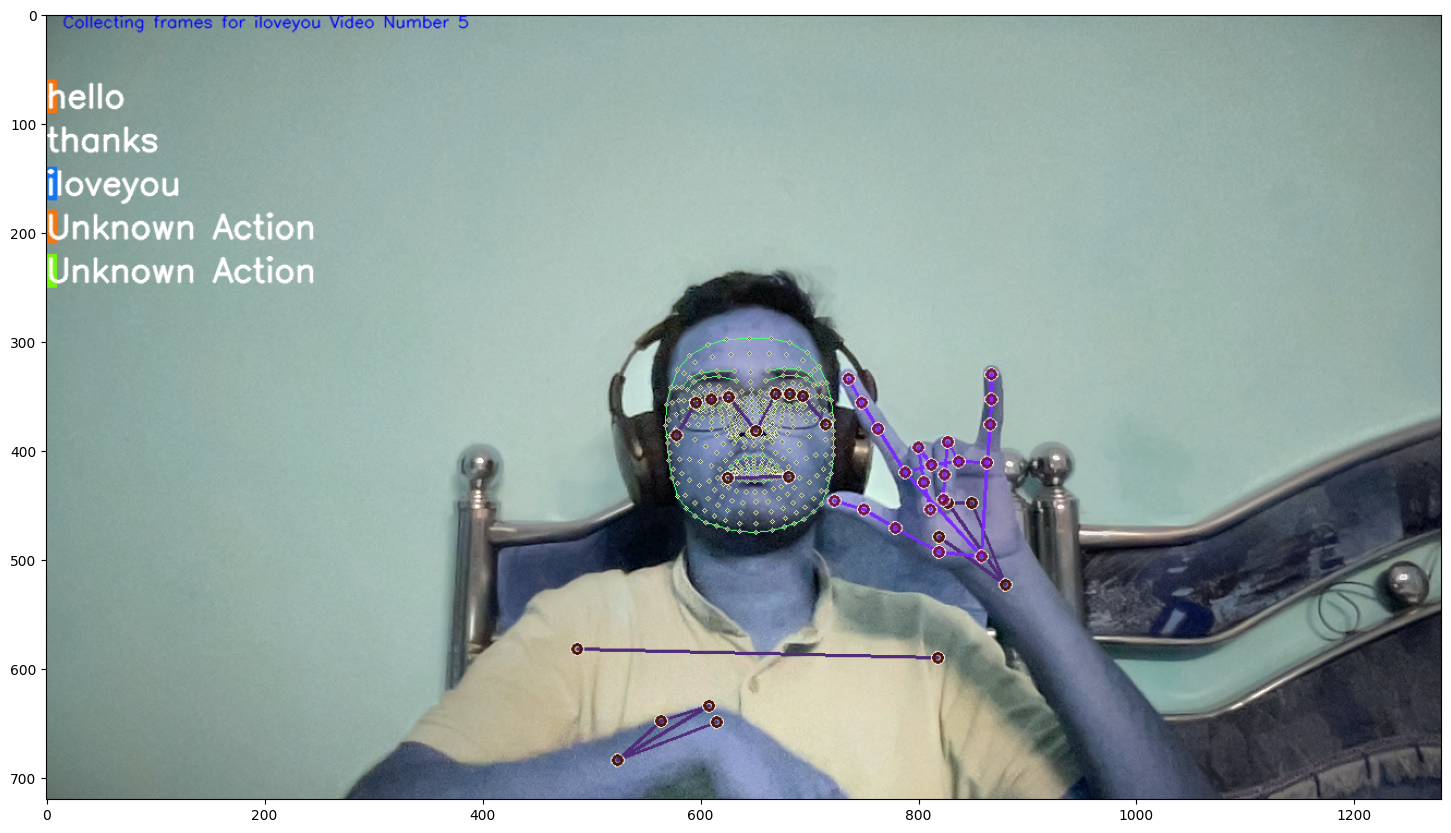

In [193]:
# Assuming you have probabilities or predictions in a variable called 'res'
# actions: List of action labels (ensure it has enough labels to match the length of 'res')
# image: The image or frame you want to overlay with probabilities
# colors: Color codes or styles for visualizing the probabilities

# Make sure 'actions' has enough labels
while len(actions) < len(res):
    # You can choose how to handle this, e.g., by repeating labels or using a default label
    actions.append("Unknown Action")

# Create a copy of the input image
output_frame = image.copy()

# Iterate through actions and their corresponding probabilities
for num, prob in enumerate(res):
    if isinstance(prob, (list, np.ndarray)):
        prob = prob[0]  # Access the first element of the list or array
    width = int(prob * 100)  # Calculate the width based on the probability
    cv2.rectangle(output_frame, (0, 60 + num * 40), (width, 90 + num * 40), colors[num], -1)
    cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

# Now, you can display the image with the probability visualizations
plt.figure(figsize=(18, 18))
plt.imshow(output_frame)
plt.show()


In [194]:
import matplotlib.pyplot as plt

# Assuming you have probabilities or predictions in a variable called 'res'
# actions: List of action labels
# image: The image or frame you want to overlay with probabilities
# colors: Color codes or styles for visualizing the probabilities

plt.figure(figsize=(18, 18))
plt.imshow(prob_viz(res, actions, image, colors))
plt.show()


TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [195]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti